<a href="https://colab.research.google.com/github/germanflighel/ia_grupo_tres_clasificacion_rocas_minas/blob/main/Rock_Mine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Input, InputLayer, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives
from keras import backend as K
import matplotlib.pyplot as plt

Definimos las librerías a utilizar

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

Se definen funciones para obtener las métricas de *recuperación* y *precisión*

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data')

Se utiliza Pandas para leer el .csv y guardarlo en un data frame

In [ ]:
df.shape

(207, 61)

Para visualizar las dimensiones del dataset:
- 207 elementos se analizaron
- Cada uno con 60 valores y su clasificación, para determinar si es una roca o una mina


In [ ]:
X = df.iloc[:, 0:60]

En `X` guardamos todos los valores de los elementos menos su clasificador

In [ ]:
Y = df.iloc[:,60] 

Y = [1 if x == 'M' else 0 for x in Y] # 1 para minas, 0 para rocas

Obtengo el clasificar para todos los elementos y se lo transforma a una representación numérica:
- 1 para minas
- 0 para rocas


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

sc_X = StandardScaler() 
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

Se particiona el dataset en conjuntos de entrenamiento y de prueba, `x_train` e `y_train` corresponden al conjunto para entrenar, con este conjunto entrenamos a nuestro modelo, ajustando los pesos.

`x_test` e `y_test` se usan para evaluar el modelo.

Se realiza además una normalización de los datos.

In [ ]:
model_one = Sequential([
    InputLayer(input_shape=x_train[0].shape),
    Dense(128, activation = 'relu', kernel_regularizer = 'l2'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model_two = Sequential([
    InputLayer(input_shape=x_train[0].shape),
    Dense(128, activation = 'relu', kernel_regularizer = 'l2'),
    Dropout(0.1),
    Dense(64, activation = 'relu', kernel_regularizer = 'l2'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

opt_one = tf.keras.optimizers.Adam(learning_rate = 0.01)
model_one.compile(optimizer = opt_one,
                  loss='binary_crossentropy',
                  metrics=['accuracy', recall_m, precision_m, TruePositives(), FalsePositives(), TrueNegatives(), FalseNegatives()])

opt_two = tf.keras.optimizers.Adam(learning_rate = 0.001)              
model_two.compile(optimizer = opt_two,
                  loss='binary_crossentropy',
                  metrics=['accuracy', recall_m, precision_m, TruePositives(), FalsePositives(), TrueNegatives(), FalseNegatives()])

Creamos nuestras dos topologías en `model_one` y `model_two`. Se detalla en el documento acerca de las características de las mismas


In [ ]:
r = model_one.fit(x_train, y_train, validation_data =(x_test, y_test), epochs = 1000)

Epoch 1/1000
5/5 [==============================] - 5s 121ms/step - loss: 1.3468 - accuracy: 0.6710 - recall_m: 0.6181 - precision_m: 0.7040 - true_positives: 50.0000 - false_positives: 20.0000 - true_negatives: 54.0000 - false_negatives: 31.0000 - val_loss: 1.0948 - val_accuracy: 0.7308 - val_recall_m: 0.8750 - val_precision_m: 0.7157 - val_true_positives: 26.0000 - val_false_positives: 10.0000 - val_true_negatives: 12.0000 - val_false_negatives: 4.0000
Epoch 2/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.8398 - accuracy: 0.8710 - recall_m: 0.8491 - precision_m: 0.8955 - true_positives: 69.0000 - false_positives: 8.0000 - true_negatives: 66.0000 - false_negatives: 12.0000 - val_loss: 0.8732 - val_accuracy: 0.8077 - val_recall_m: 0.9250 - val_precision_m: 0.7592 - val_true_positives: 28.0000 - val_false_positives: 8.0000 - val_true_negatives: 14.0000 - val_false_negatives: 2.0000
Epoch 3/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.6185 - accu

Se entrena al modelo, en este caso solo uno.

In [ ]:
print(np.average(r.history['val_loss']))
print(np.average(r.history['val_accuracy']))
print(np.average(r.history['val_recall_m']))
print(np.average(r.history['val_precision_m']))

true_positives = np.average(r.history['val_true_positives'])
false_positives = np.average(r.history['val_false_positives'])
true_negatives = np.average(r.history['val_true_negatives'])
false_negatives = np.average(r.history['val_false_negatives'])
print(true_positives)
print(false_positives)
print(true_negatives)
print(false_negatives)

print(true_positives + false_positives + true_negatives + false_negatives)

0.8217507687807083
0.8373076977133751
0.932249986410141
0.7893874443173409
28.57
7.03
14.97
1.43
52.0


Mostramos las métricas del modelo entrenado y validado para su posterior análisis.

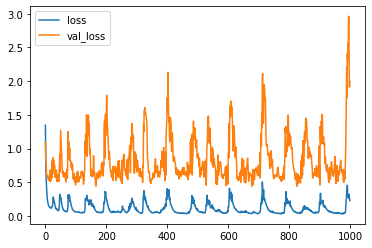

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

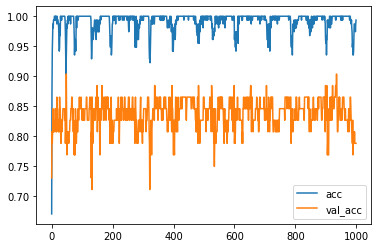

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

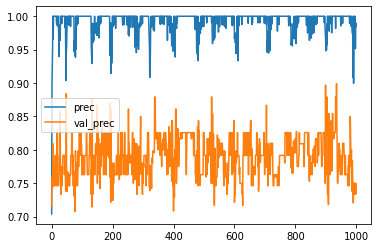

In [ ]:
plt.plot(r.history['precision_m'], label='prec')
plt.plot(r.history['val_precision_m'], label='val_prec')
plt.legend()

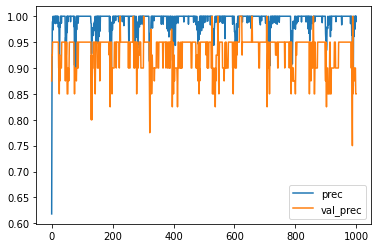

In [ ]:
plt.plot(r.history['recall_m'], label='prec')
plt.plot(r.history['val_recall_m'], label='val_prec')
plt.legend()

Se muestran diversos gráficos de la evolución del modelo y de las diferentes iteraciones del modelo. Es posible visualizar si en algún epoch el modelo fue más efectivo.